In [1]:
import numpy as np
import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
import IPython.display as ipd
import librosa
import librosa.display
from glob import glob
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
matplotlib.style.use('ggplot')

print('package done!')

D:\Applications\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


package done!


In [2]:
meta_data = pd.read_csv("E:/Urban Sound/UrbanSound8k.csv")
meta_data[10:]

,slice_file_name,fsID,start,end,salience,fold,classID,class
10,100648-1-1-0.wav,100648,8.998279,10.052132,2,10,1,car_horn
11,100648-1-2-0.wav,100648,16.699509,17.104837,2,10,1,car_horn
12,100648-1-3-0.wav,100648,17.631764,19.253075,2,10,1,car_horn
13,100648-1-4-0.wav,100648,25.332994,27.197502,2,10,1,car_horn
14,100652-3-0-0.wav,100652,0.000000,4.000000,1,2,3,dog_bark
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [3]:
print(f"Total Training Data: {meta_data.shape[0]} \n Number of classes = {len(meta_data['class'].unique())}")

Total Training Data: 8732 
 Number of classes = 10


In [4]:
print(meta_data['class'].unique())

['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']


In [5]:
##Distribution of category
category_group = meta_data.groupby(['class']).count()
category_group

,slice_file_name,fsID,start,end,salience,fold,classID
class,,,,,,,
air_conditioner,1000,1000,1000,1000,1000,1000,1000
car_horn,429,429,429,429,429,429,429
children_playing,1000,1000,1000,1000,1000,1000,1000
dog_bark,1000,1000,1000,1000,1000,1000,1000
drilling,1000,1000,1000,1000,1000,1000,1000
engine_idling,1000,1000,1000,1000,1000,1000,1000
gun_shot,374,374,374,374,374,374,374
jackhammer,1000,1000,1000,1000,1000,1000,1000
siren,929,929,929,929,929,929,929


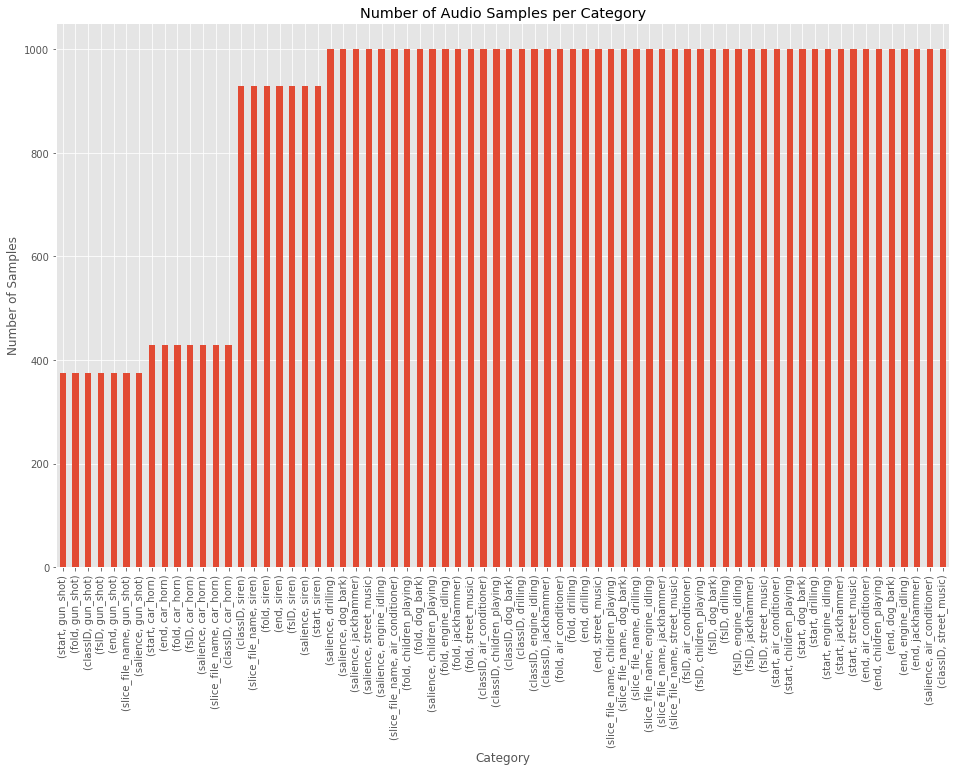

In [6]:
plot = category_group.unstack().reindex(category_group.unstack().sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");

In [7]:
print('Minimum samples per category = ', min(meta_data['class'].value_counts()))
print('Maximum samples per category = ', max(meta_data['class'].value_counts()))

Minimum samples per category =  374
Maximum samples per category =  1000


In [8]:
###Audo Directory
Data_dir = "E:/Urban Sound/Data/"

In [9]:
len(os.listdir(Data_dir))

10

In [10]:
#Using glob
input_dir = Data_dir +"*/"
a_file = glob(input_dir + '*wav')
len(a_file)

8795

In [11]:
a_file[2000:2200]

['E:/Urban Sound/Data\\fold2\\160011-2-0-3.wav',
 'E:/Urban Sound/Data\\fold2\\160011-2-0-34.wav',
 'E:/Urban Sound/Data\\fold2\\160011-2-0-5.wav',
 'E:/Urban Sound/Data\\fold2\\160011-2-0-7.wav',
 'E:/Urban Sound/Data\\fold2\\160011-2-0-9.wav',
 'E:/Urban Sound/Data\\fold2\\160092-3-0-0.wav',
 'E:/Urban Sound/Data\\fold2\\160366-3-0-13.wav',
 'E:/Urban Sound/Data\\fold2\\160366-3-0-4.wav',
 'E:/Urban Sound/Data\\fold2\\160366-3-0-7.wav',
 'E:/Urban Sound/Data\\fold2\\160366-3-0-8.wav',
 'E:/Urban Sound/Data\\fold2\\162541-1-0-0.wav',
 'E:/Urban Sound/Data\\fold2\\162541-1-1-0.wav',
 'E:/Urban Sound/Data\\fold2\\162541-1-2-0.wav',
 'E:/Urban Sound/Data\\fold2\\163460-6-0-0.wav',
 'E:/Urban Sound/Data\\fold2\\165643-4-0-0.wav',
 'E:/Urban Sound/Data\\fold2\\165775-7-0-0.wav',
 'E:/Urban Sound/Data\\fold2\\165775-7-1-0.wav',
 'E:/Urban Sound/Data\\fold2\\166421-3-0-29.wav',
 'E:/Urban Sound/Data\\fold2\\166421-3-0-31.wav',
 'E:/Urban Sound/Data\\fold2\\166421-3-0-5.wav',
 'E:/Urban Sound

In [12]:
fname= Data_dir + 'fold6/' + '111386-5-1-2.wav'
ipd.Audio(fname)

In [13]:
#loading using librosa
audio, sr = librosa.load(fname)
dur_ = librosa.get_duration(audio)
print('Duration = ',dur_)
print(audio.shape,sr)
print(audio)


Duration =  4.0
(88200,) 22050
[0.08458257 0.10123243 0.0411451  ... 0.04313049 0.03208422 0.05133606]


In [14]:
samrate = librosa.get_samplerate(fname)
samrate

44100

In [96]:
def get_duration(Data_dir):
    for i in range(8732):
        filename = Data_dir + 'fold' +str(meta_data['fold'][i]) +'/' + meta_data['slice_file_name'][i]
        audio,sr = librosa.load(filename)
        duration = librosa.get_duration(audio)
        s_rate = librosa.get_samplerate(filename)
        meta_data['duration'][i] = duration
        meta_data['sampling_rate'][i] = s_rate
        
        
    

In [ ]:
temp = get_duration(Data_dir)

In [ ]:
meta_data[600:660]

In [93]:
meta_data['sampling_rate'] == 48000

8732

In [94]:
for i in range(8732):
    print(a[i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [1]:
def librosa_info(fname):
    s_rate = librosa.get_samplerate(fname)
    print(f"Sampling Rate: {s_rate}")
    audio, _ = librosa.load(fname)
    duration = librosa.get_duration(audio)
    print(f"Audio: {audio}")
    print(f"Audio Dimnesion: {audio.ndim}")
    print(f"Length of Audio: {len(audio)}")
    print(f"Duration: {duration}")
    print(f"Audio shape: {audio.shape}")
    s_audio = audio_normalization(audio)
    print(f"Reshaped Audio: {s_audio}")
    print(f"Length of Reshaped Audio: {len(s_audio)}")
    print(f"Reshaped Audio Dimnesion: {s_audio.ndim}")